# (Ford Gobike System)
## by (Mariem Ade)

### Preliminary Wrangling

> This dataset includes renting data from bike renting application 
the data includes anonymized data about each trip 

> my main goal is to see the effect of covid over the bike riders

---
### The  included comlumns :

- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
---

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime as date

%matplotlib inline

> remove warnings from output

In [2]:
import warnings
warnings.simplefilter("ignore")

> load each month get the day and the month and duration if not available

https://stackoverflow.com/questions/43305577/python-calculate-the-difference-between-two-datetime-time-objects/43308104
used this link to calculate duration from april to august

https://www.datacamp.com/community/tutorials/converting-strings-datetime-objects?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=278443377095&utm_targetid=aud-299261629574:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1005386&gclid=CjwKCAjwq_D7BRADEiwAVMDdHjze8r8FRopCaZO0yMX4qdF2uHVNREtqe2LsR8g2oo2xTsg4Rm7y1hoCdWIQAvD_BwE used this link to get day name and month name from datetime

In [3]:
def get_min_day_month(df):
    df['start_time']=pd.to_datetime(df['start_time'])
    df['month']=df['start_time'].apply(lambda x: x.strftime("%B"))
    df['day']=df['start_time'].apply(lambda x: x.strftime("%A"))
    df['hour'] = df['start_time'].apply(lambda x: x.hour)
    df['year'] = df['start_time'].apply(lambda x: x.year)
    df['duration_min'] = df.duration_sec.apply(lambda x: x/60) 
    return df

In [4]:
df_19_01 = pd.read_csv("201901-fordgobike-tripdata.csv")
df_19_01 = get_min_day_month(df_19_01) 

In [5]:
df_19_02 = pd.read_csv("201902-fordgobike-tripdata.csv")
df_19_02 = get_min_day_month(df_19_02) 

In [6]:
df_19_03 = pd.read_csv("201903-fordgobike-tripdata.csv")
df_19_03 = get_min_day_month(df_19_03) 

In [7]:
df_19_04 = pd.read_csv("201904-fordgobike-tripdata.csv")
df_19_04 = get_min_day_month(df_19_04) 

In [8]:
df_19_05 = pd.read_csv("201905-baywheels-tripdata.csv")
df_19_05 = get_min_day_month(df_19_05) 

In [9]:
df_19_06 = pd.read_csv("201906-baywheels-tripdata.csv")
df_19_06 = get_min_day_month(df_19_06) 

In [10]:
df_19_07 = pd.read_csv("201907-baywheels-tripdata.csv")
df_19_07 = get_min_day_month(df_19_07) 

In [11]:
df_19_08 = pd.read_csv("201908-baywheels-tripdata.csv")
df_19_08 = get_min_day_month(df_19_08) 

In [12]:
df_20_01 = pd.read_csv("202001-baywheels-tripdata.csv")
df_20_01 = get_min_day_month(df_20_01) 

In [13]:
df_20_02 = pd.read_csv("202002-baywheels-tripdata.csv")
df_20_02 = get_min_day_month(df_20_02)  

In [14]:
df_20_03 = pd.read_csv("202003-baywheels-tripdata.csv")
df_20_03 = get_min_day_month(df_20_03) 

In [15]:
def ridertype(df):
    df["user_type"] = ""
    for i in range(df.shape[0]):
        if df['member_casual'][i]== 'casual':
            df["user_type"][i] = 'Customer'
        elif df['member_casual'][i]== 'member':
            df["user_type"][i] = 'Subscriber'
    return df   

In [16]:
def renameing(df):
    df.rename(columns = {'started_at': 'start_time', 'ended_at': 'end_time','start_lat': 'start_station_latitude', 'start_lng': 'start_station_longitude','end_lat': 'end_station_latitude', 'end_lng': 'end_station_longitude'}, inplace = True)
    return df

In [17]:
def get_hour_day_month(df):
    df['started_at']=pd.to_datetime(df['started_at'])
    df['month']=df['started_at'].apply(lambda x: x.strftime("%B"))
    df['day']=df['started_at'].apply(lambda x: x.strftime("%A"))
    df['duration_sec'] = (pd.to_datetime(df['ended_at']) -df['started_at'])
    df['duration_sec'] = df['duration_sec'].apply(lambda x: x.total_seconds())
    df['hour'] = df['started_at'].apply(lambda x: x.hour)
    df['duration_min'] = df.duration_sec.apply(lambda x: x/60) 
    df['year'] = df['started_at'].apply(lambda x: x.year)
    return df

In [18]:
def df_mod(df):
    df = get_hour_day_month(df)
    df = ridertype(df)
    df = renameing(df)
    return df
    

In [19]:
df_20_04 = pd.read_csv("202004-baywheels-tripdata.csv")
df_20_04 = df_mod(df_20_04)


In [20]:
df_20_05 = pd.read_csv("202005-baywheels-tripdata.csv")
df_20_05 = df_mod(df_20_05)

In [21]:
df_20_06 = pd.read_csv("202006-baywheels-tripdata.csv")
df_20_06 = df_mod(df_20_06) 

In [22]:
df_20_07 = pd.read_csv("202007-baywheels-tripdata.csv")
df_20_07 = df_mod(df_20_07) 

In [23]:
df_20_08 = pd.read_csv("202008-baywheels-tripdata.csv")
df_20_08 = df_mod(df_20_08) 

In [24]:
df_row = pd.concat([df_19_01,df_19_02,df_19_03,df_19_04,df_19_05,df_19_06,df_19_07,df_19_08,df_20_01,df_20_02,df_20_03,df_20_04,df_20_05,df_20_06,df_20_07,df_20_08])
df_row.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,month,day,hour,year,duration_min,rental_access_method,ride_id,rideable_type,member_casual,is_equity
0,80825.0,2019-01-31 17:57:44.613,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,...,January,Thursday,17,2019,1347.083333,NaN,NaN,NaN,NaN,NaN
1,65900.0,2019-01-31 20:58:33.886,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,...,January,Thursday,20,2019,1098.333333,NaN,NaN,NaN,NaN,NaN
2,62633.0,2019-01-31 18:06:52.924,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,...,January,Thursday,18,2019,1043.883333,NaN,NaN,NaN,NaN,NaN
3,44680.0,2019-01-31 19:46:09.719,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,...,January,Thursday,19,2019,744.666667,NaN,NaN,NaN,NaN,NaN
4,60709.0,2019-01-31 14:19:01.541,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,...,January,Thursday,14,2019,1011.816667,NaN,NaN,NaN,NaN,NaN


In [25]:
df_row.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3306602 entries, 0 to 152445
Data columns (total 24 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             float64       
 1   start_time               datetime64[ns]
 2   end_time                 object        
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  float64       
 12  user_type                object        
 13  bike_share_for_all_trip  object        
 14  month                    object        
 15  day                      object        
 16  hour                     int64         
 17  year                     int

In [26]:
df_row.shape

(3306602, 24)

>check for duplication and remove it

In [27]:
df_row.duplicated().sum()

7512

In [28]:
df_row.drop_duplicates(inplace = True)

In [29]:
df_row.duplicated().sum()

0

In [30]:
df = df_row.loc[:,('month','day','user_type','hour','duration_min','year')]
df.head()

,month,day,user_type,hour,duration_min,year
0,January,Thursday,Subscriber,17,1347.083333,2019
1,January,Thursday,Subscriber,20,1098.333333,2019
2,January,Thursday,Customer,18,1043.883333,2019
3,January,Thursday,Customer,19,744.666667,2019
4,January,Thursday,Customer,14,1011.816667,2019


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3299090 entries, 0 to 152445
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   month         object 
 1   day           object 
 2   user_type     object 
 3   hour          int64  
 4   duration_min  float64
 5   year          int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 176.2+ MB


In [32]:
df.isna().sum()

month           0
day             0
user_type       0
hour            0
duration_min    0
year            0
dtype: int64

### What is the structure of your dataset?

> 1593098 ride : 
months from january to augest for each ride

### What is/are the main feature(s) of interest in your dataset?

> type
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> month , duration , start time ,week day , hour

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

plot week day distribution

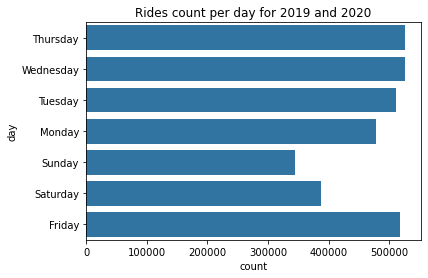

In [59]:
base_color = sb.color_palette()[0]
sb.countplot(data = df, y = 'day', color = base_color).set_title("Rides count per day for 2019 and 2020");

there is not a huge diff in number between days

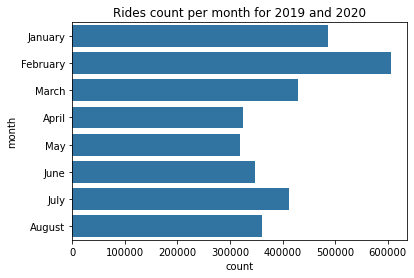

In [60]:
sb.countplot(data = df, y = 'month', color = base_color).set_title("Rides count per month for 2019 and 2020");

it s obvious that corona effected the usage of the service as (jan and feb) are much higer before the panadimic 

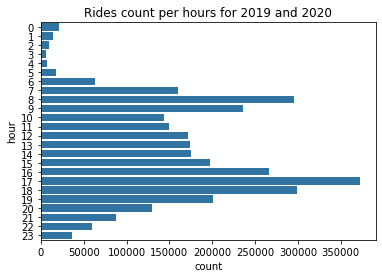

In [61]:
sb.countplot(data = df, y = 'hour', color = base_color).set_title("Rides count per hours for 2019 and 2020");

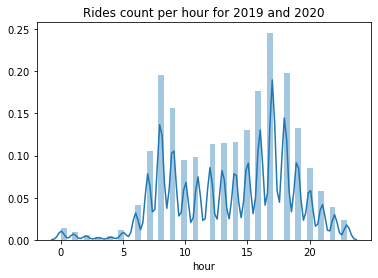

In [63]:
sb.distplot(df.hour).set_title("Rides count per hour for 2019 and 2020");

as a general idea most users use it to go to work ( 2 peaks at 8 am and 17)

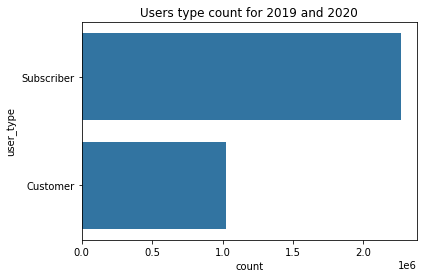

In [62]:
sb.countplot(data = df, y = 'user_type', color = base_color).set_title("Users type count for 2019 and 2020");

we can not see huge diff this need further analysis to see the effec of the panadimic

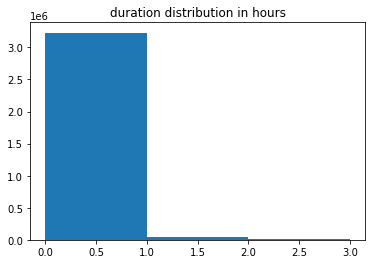

In [38]:
plt.title('duration distribution in hours')
plt.hist(df.duration_min/60 ,bins = range(0,4) );

remove durations less than 0

In [39]:
df.loc[df.duration_min<0].shape

(417, 6)

In [40]:
df = df[df.duration_min>0]

In [41]:
df.loc[df.duration_min<0].shape

(0, 6)

## shape befor removing wrong inputs
> logically no one can ride a bike for half a day
> after many trials 3 hour as boundry lead to good results

In [42]:
df.shape

(3298510, 6)

In [43]:
df = df[(df.duration_min)/60<3]

In [44]:
df.shape

(3289370, 6)

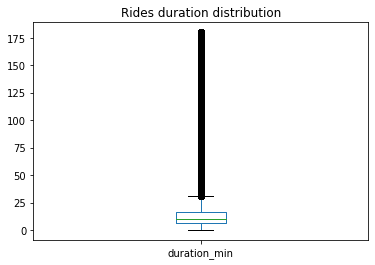

In [65]:
df.duration_min.plot(kind = 'box').set_title("Rides duration distribution");


will check for outliers and remove them later

test for trips less than 25 min (try and error from box plot)

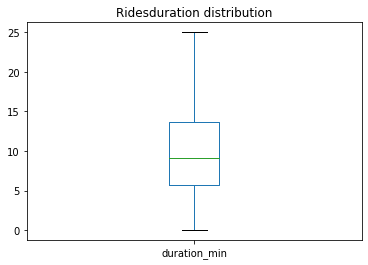

In [67]:
df[df.duration_min <25].duration_min.plot(kind = 'box').set_title("Ridesduration distribution");

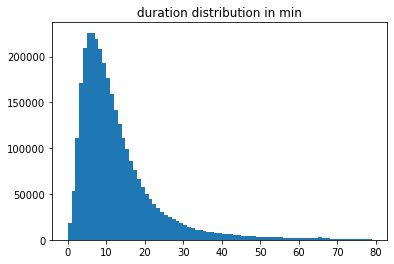

In [47]:
plt.title('duration distribution in min')
plt.hist(df.duration_min ,bins = range(0,80) );

it is obvious that the majorty rides for less than 15 min

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

#### week days:
- uniform it need more analysis to see the pandamic effect

#### start hour 
- has 2 peaks mostly indcated that used ffor work

#### duration 
- right skwed which is logical however the mean is less than 20

#### user type 
- need further analysis to see the effect of panadimic over the subscribtion 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

#### start time

- I used it to get week day / month / starting hour / and duration from april to august
- main goal is to see how covid effected the usage pattern comparing each of the above before ( jan and feb) and after coved ( april may june july and august)

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

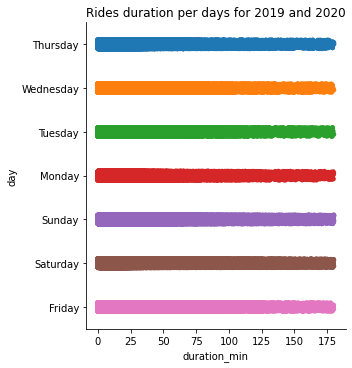

In [69]:
sb.catplot(y="day", x="duration_min", data=df).set(title ="Rides duration per days for 2019 and 2020");

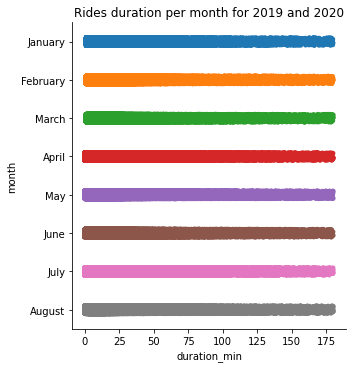

In [70]:
sb.catplot(y="month", x="duration_min", data=df).set(title ="Rides duration per month for 2019 and 2020");

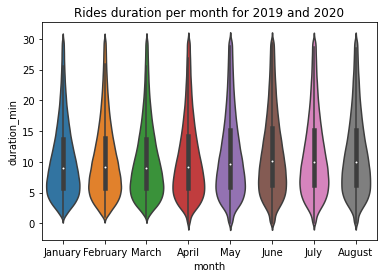

In [71]:
#plot for durations under 30 min
temp_df = df[df.duration_min<30]
sb.violinplot(data = temp_df, x = 'month', y = 'duration_min').set(title ="Rides duration per month for 2019 and 2020");

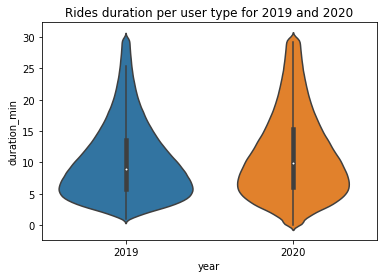

In [72]:
sb.violinplot(data = temp_df, x = 'year', y = 'duration_min').set(title ="Rides duration per user type for 2019 and 2020");

the duration needs further analysis

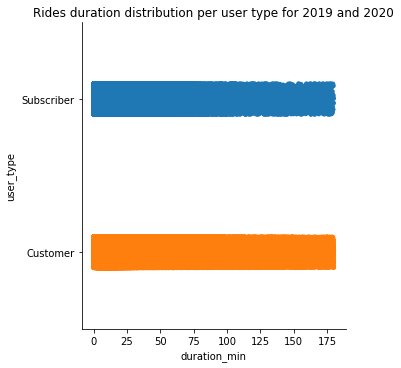

In [73]:
sb.catplot(y="user_type", x="duration_min", data=df).set(title ="Rides duration distribution per user type for 2019 and 2020");

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> between user type and duration 
- customer tends to have longer rides than subscribers

## Multivariate Exploration


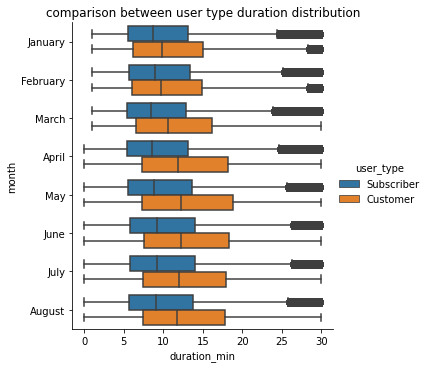

In [77]:
sb.catplot(x="duration_min", y="month", hue="user_type", kind="box", data=temp_df).set(title ="comparison between user type duration distribution");

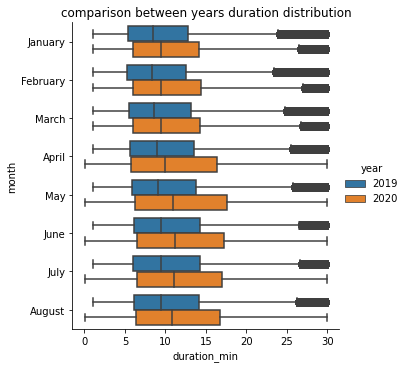

In [78]:
sb.catplot(x="duration_min", y="month", hue="year", kind="box", data=temp_df).set(title ="comparison between years duration distribution");

the  effect of the covid on the duration of rides in each curtomer type

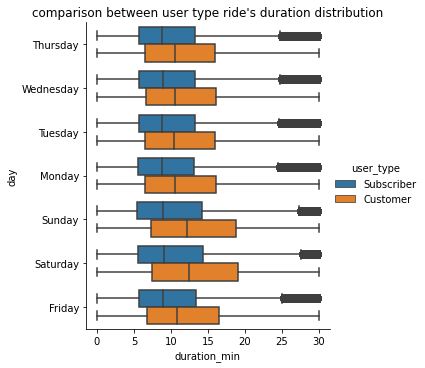

In [80]:
sb.catplot(x="duration_min", y="day", hue="user_type", kind="box", data=temp_df).set(title ="comparison between user type ride's duration distribution");


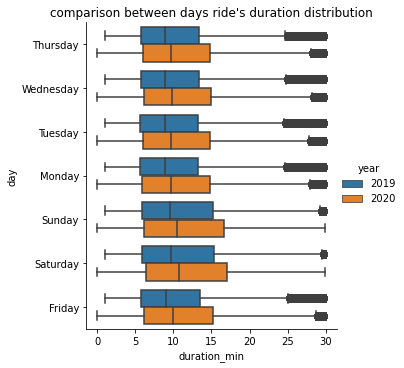

In [81]:
sb.catplot(x="duration_min", y="day", hue="year", kind="box", data=temp_df).set(title ="comparison between days ride's duration distribution");

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> rides duration varies between customer types in each day
### Were there any interesting or surprising interactions between features?

> the effect of covid-19 (months) to duration on customer types is interesting

save data after wrangling

In [57]:
df.to_csv("data.csv")